In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###set path, get labels
directory = './train'
filepath = []
category = []
for image in os.listdir('train'):
    path = os.path.join(directory, image)
    image_name = image.split('.')[0]
    filepath.append(path)
    category.append(image_name)
category = [1 if i == 'dog' else 0 for i in category]
df = pd.DataFrame({"filepath":filepath,"category":category})
df.head(3)

,filepath,category
0,./train/dog.8011.jpg,1
1,./train/cat.5077.jpg,0
2,./train/dog.7322.jpg,1


In [5]:
####check the number of dogs and cats
df.groupby('category').count()

,filepath
category,
0,12501
1,12500


In [6]:
#### choose 1000 images as sample randomly
df = df.sample(n=1000,  random_state=2019)
df.head(3)

,filepath,category
22569,./train/dog.1600.jpg,1
11831,./train/dog.3043.jpg,1
2558,./train/cat.8814.jpg,0


In [7]:
## get array of every image
from PIL import Image
image_size = 64
x_data = []
for image in df.filepath:
    im = Image.open(image)
#     print(im.format, im.size, im.mode)
    img = im.resize((image_size, image_size))
    x_data.append(np.array(img))
x_data = np.array(x_data)
x_data.shape

(1000, 64, 64, 3)

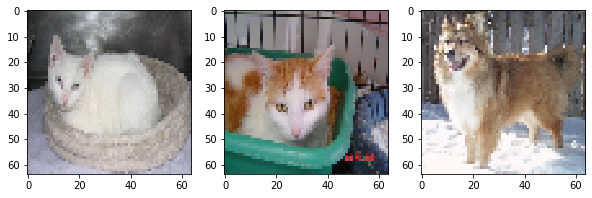

In [8]:
### plot 3 images
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
j = 1
for i in range(100,103):
    plt.subplot(1,3,j)
    plt.imshow(x_data[i])
    j = j + 1

In [9]:
x_data = x_data.flatten().reshape(1000, 12288)
y_data = df.category
x_data.shape

(1000, 12288)

In [10]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
x_data = normalize(x_data, norm='max', axis=0)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state = 2019)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 12288)
(200, 12288)
(800,)
(200,)
